### Import libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Week 1: Data Exploration and Preprocessing

#### Task 1 : Import and Understand Data

In [53]:
data = pd.read_csv('Stock Market Dataset.csv') # Load the dataset

In [54]:
data.head() # Display the first few rows to understand its structure.

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [55]:
data.info() # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

In [56]:
data.describe() # Basic Statistics

,Unnamed: 0,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Vol.,Platinum_Vol.,Ethereum_Vol.,...,Nvidia_Price,Nvidia_Vol.,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Vol.
count,1243.000000,1243.000000,1239.000000,1243.000000,1.220000e+03,1243.000000,1206.000000,1.243000e+03,636.000000,1.243000e+03,...,1243.000000,1.243000e+03,1243.000000,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1241.000000
mean,621.000000,3.494714,131624.116223,67.577064,3.989038e+05,3.541957,35406.616915,4.033918e+07,9082.515723,1.801563e+07,...,187.285841,4.560298e+07,2426.524537,404.839541,7.057401e+06,128.683234,7.413005e+07,239.728134,2.325851e+07,211127.671233
std,358.967501,1.822540,64385.141749,20.465500,2.161619e+05,0.702819,38415.448731,2.940889e+08,8876.538587,1.326933e+08,...,134.679941,1.869107e+07,2660.497572,114.989473,6.384187e+06,30.808631,3.245753e+07,71.015427,1.555486e+07,115006.351292
min,0.000000,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,10.000000,2.600000e+02,0.000000,7.518000e+04,...,33.450000,9.790000e+06,80.000000,166.370000,1.140000e+06,79.410000,1.763000e+07,88.910000,5.470000e+06,0.000000
25%,310.500000,2.347500,91900.000000,55.095000,2.835975e+05,2.858750,370.000000,7.907500e+04,1120.000000,5.883600e+05,...,73.905000,3.245000e+07,345.000000,323.010000,3.990000e+06,96.260000,5.264500e+07,183.355000,1.478500e+07,152200.000000
50%,621.000000,2.702000,127370.000000,69.230000,3.668850e+05,3.666000,10180.000000,2.153100e+05,6070.000000,1.570000e+06,...,151.590000,4.279000e+07,1510.000000,384.150000,5.610000e+06,128.730000,6.520000e+07,224.430000,1.934000e+07,197970.000000
75%,931.500000,4.055500,169460.000000,80.455000,5.072425e+05,4.137250,68340.000000,6.151050e+05,15287.500000,9.365000e+06,...,242.140000,5.511500e+07,3225.000000,495.365000,7.910000e+06,158.110000,8.674500e+07,301.650000,2.711500e+07,257920.000000
max,1242.000000,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,4.470000e+09,42830.000000,1.790000e+09,...,661.600000,1.534600e+08,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,813410.000000


#### Task 2: Exploratory Data Analysis (EDA)

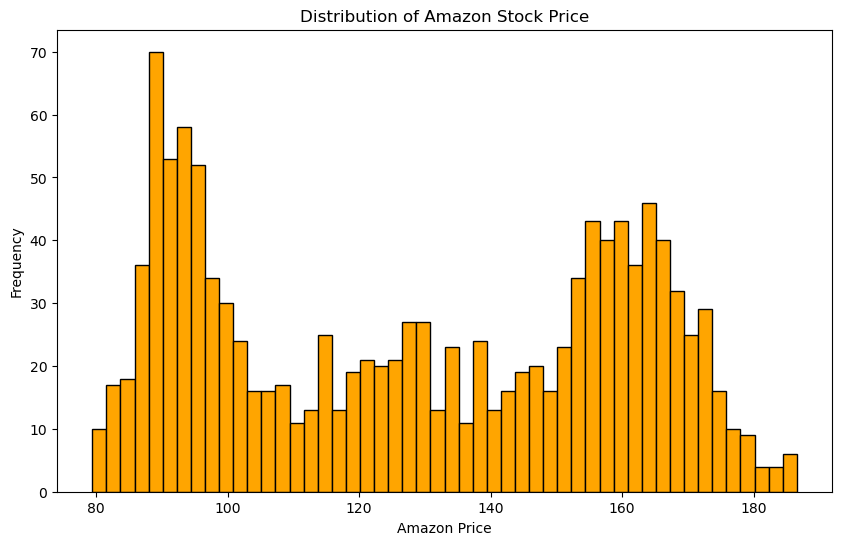

In [57]:
# Visualise the distribution of the target variable (Amazon_Price)
# Convert Amazon_Price to numeric after handling commas
data['Amazon_Price'] = data['Amazon_Price'].astype(str).str.replace(',', '').astype(float)

# Plot the distribution of Amazon_Price
plt.figure(figsize=(10, 6))
plt.hist(data['Amazon_Price'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Amazon Stock Price')
plt.xlabel('Amazon Price')
plt.ylabel('Frequency')
plt.show()

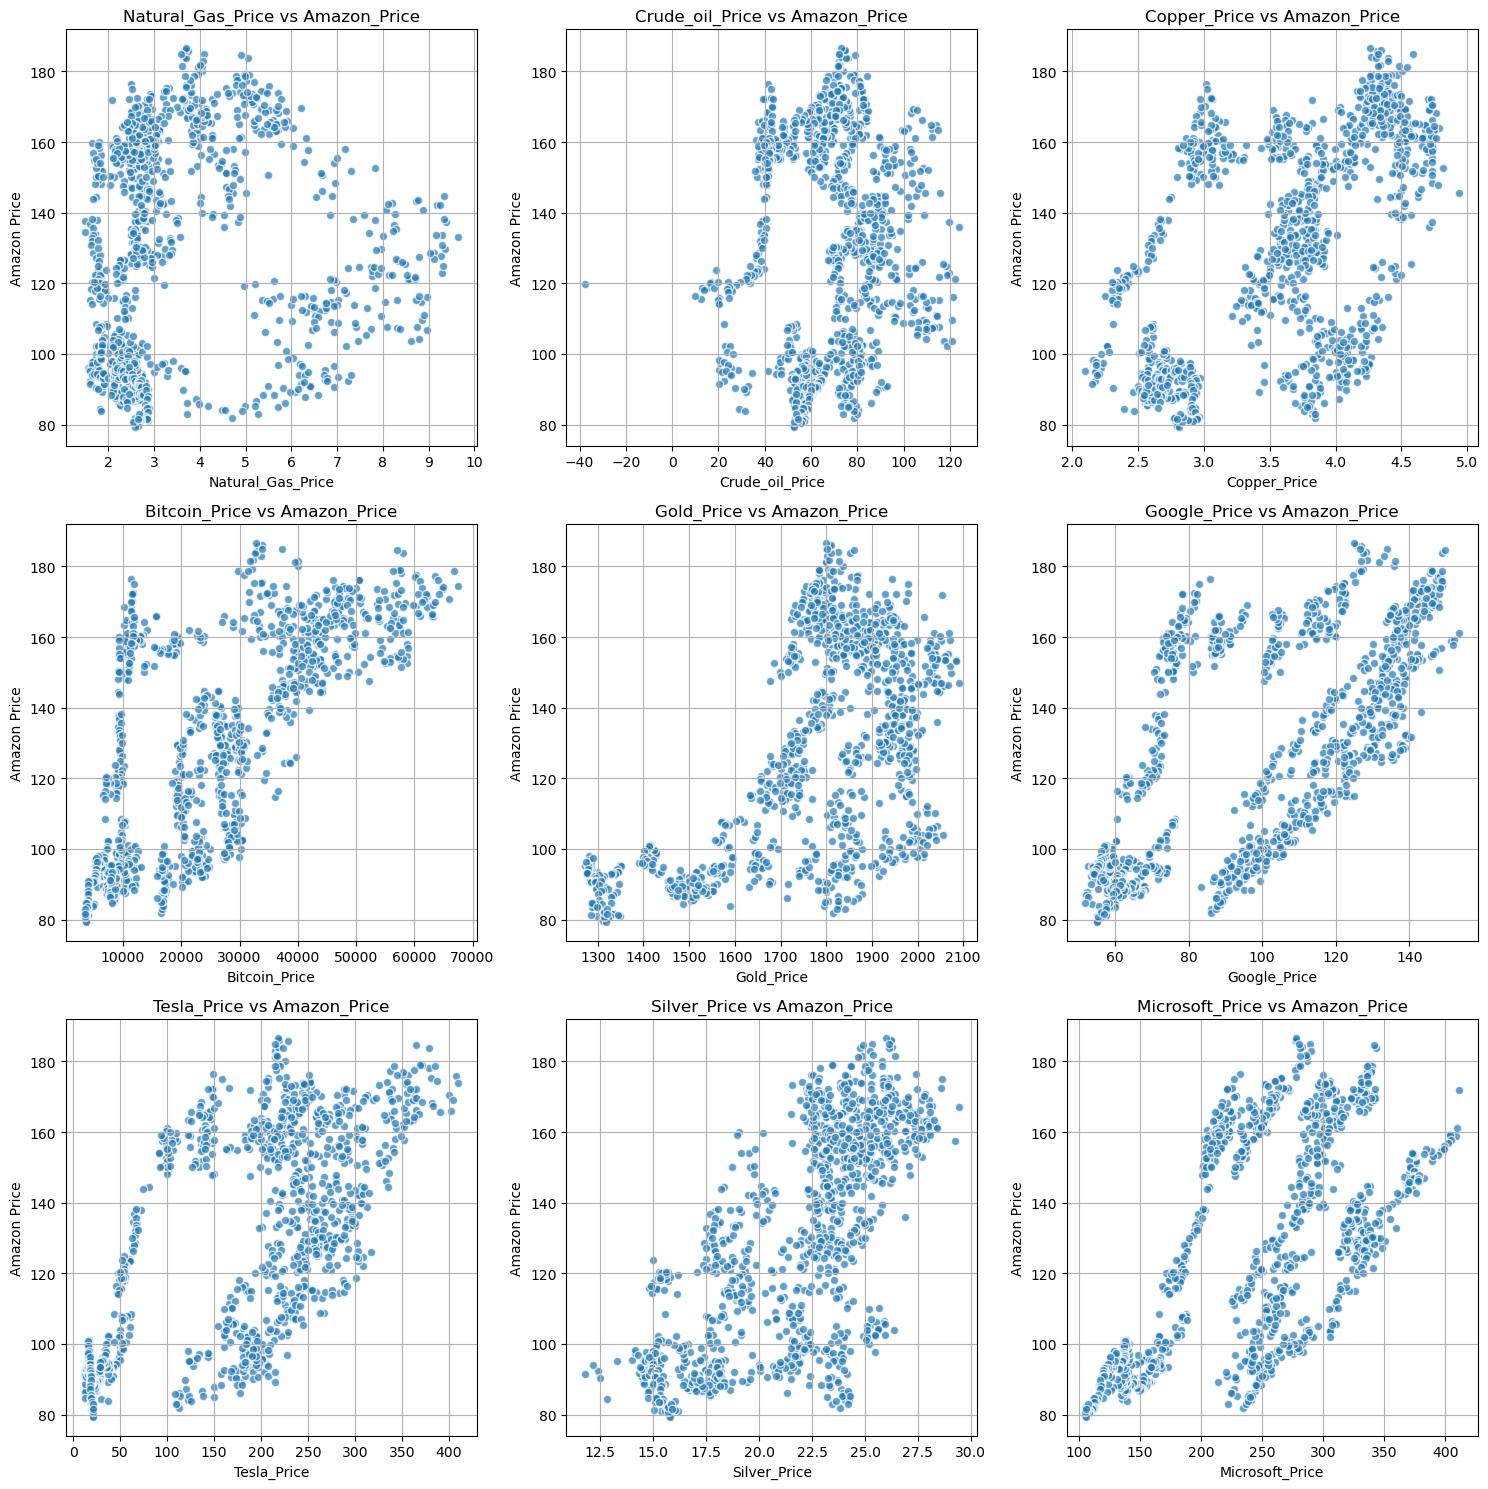

In [58]:
# Analyse relationships between Amazon_Price and other features using scatter plots
# List of features to compare with Amazon_Price
features = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 'Gold_Price', 'Google_Price', 'Tesla_Price', 'Silver_Price', 'Microsoft_Price']

# Convert necessary columns to numeric, handling non-string columns
for feature in features:
    if data[feature].dtype == 'object':
        data[feature] = data[feature].str.replace(',', '').astype(float)

# Set the number of columns for subplots and calculate the required number of rows
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # Round up to ensure all features are plotted

# Create subplots with the required number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create scatter plots
for i, feature in enumerate(features):
    axes[i].scatter(data[feature], data['Amazon_Price'], alpha=0.7, edgecolors='w')
    axes[i].set_title(f'{feature} vs Amazon_Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Amazon Price')
    axes[i].grid(True)

# Hide any unused subplots if features are less than the total subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

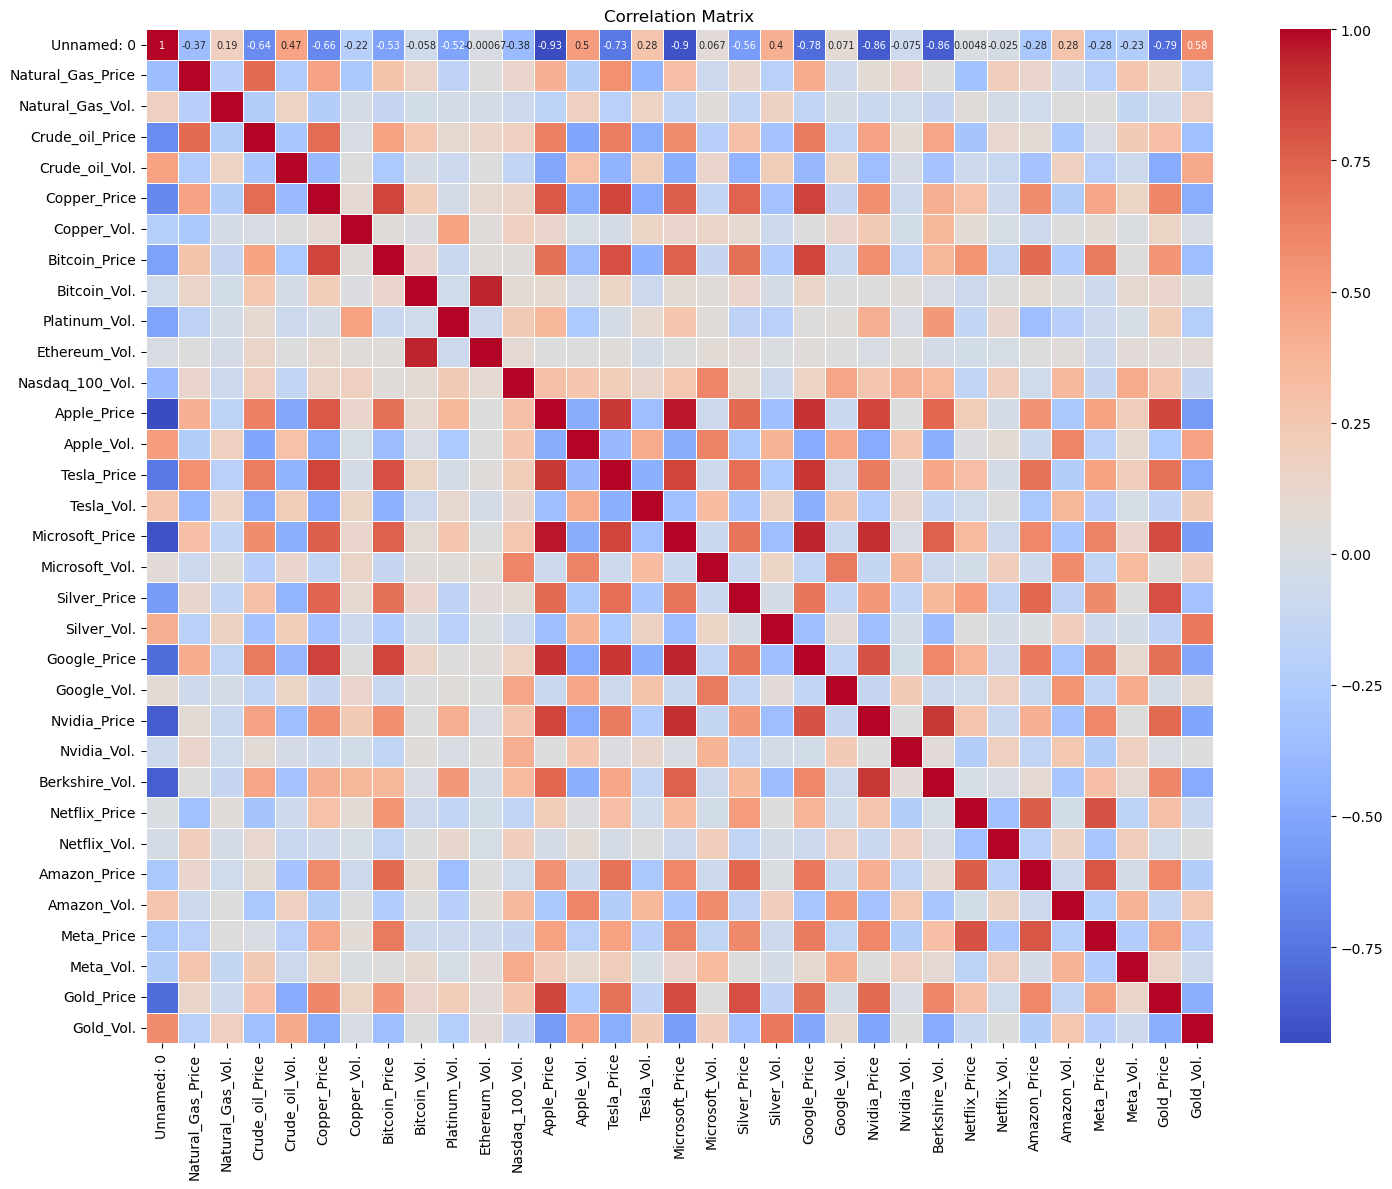

In [59]:
# Compute and visualize the correlation matrix
# Select numeric columns for the correlation matrix
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_cols].corr()

# Create the heatmap with adjusted layout
plt.figure(figsize=(15, 12))  
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5, 
    annot_kws={"size": 7},  
)
plt.title('Correlation Matrix')
plt.tight_layout() 
plt.show()

#### Task 3: Feature Engineering

In [60]:
# Handle missing values by filling them with the mean of the respective columns
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

missing_values_before = data.isnull().sum() #check for missing values
if missing_values_before.sum() > 0:
    print("Missing values before handling:\n", missing_values_before[missing_values_before > 0])
else:
    print("\nNo missing values after handling.")


No missing values after handling.


In [61]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
features = numeric_cols.drop('Amazon_Price')
data[features] = scaler.fit_transform(data[features])
data.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,-1.730658,02-02-2024,-0.777093,0.000000,0.229891,2.719160e-16,0.397906,0.0,1.120470,-0.137077,...,"5,89,498",3.065877,1.390256,-0.474394,171.81,1.328114,3.314161,3.952219,1.449244,0.000000
1,-1.727871,01-02-2024,-0.793012,0.462464,0.305170,8.363643e-01,0.443456,0.0,1.113399,-0.137060,...,"5,81,600",2.765060,1.415225,-0.612290,159.28,-0.239488,2.184233,0.121007,1.534884,0.433476
2,-1.725084,31-01-2024,-0.765566,0.174863,0.404401,-2.541929e-01,0.518185,0.0,1.082136,-0.137030,...,"5,78,020",2.742499,1.385645,-0.349034,155.20,-0.753289,2.118869,-0.208926,1.516673,0.237163
3,-1.722297,30-01-2024,-0.778191,0.126462,0.500699,-2.413464e-01,0.525302,0.0,1.104961,-0.137034,...,"5,84,680",2.753779,1.374683,-0.146891,159.00,-0.981371,2.258613,-0.298966,1.435463,0.030142
4,-1.719510,29-01-2024,-0.551493,-1.992578,0.449861,-3.128667e-01,0.479753,0.0,1.127029,-0.137068,...,"5,78,800",4.295465,1.487260,-0.027799,161.26,-0.964419,2.272137,-0.351704,1.356714,-1.822515


### Week 2: Model Development

#### Task 1: Split the Data

In [62]:
X = data[features] # Define the features (X) and the target variable (y)
y = data['Amazon_Price']

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Task 2: Train the Model

In [64]:
model = LinearRegression() # Initialize the Linear Regression model
model.fit(X_train, y_train) # Train the model on the training data

LinearRegression()

In [65]:
# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 5.744554191384351
Mean Squared Error (MSE): 50.10538758053285
Root Mean Squared Error (RMSE): 7.078515916527478


### Week 3: Model Validation and Testing

#### Task 1: Cross-Validation

In [66]:
# Perform 5-fold cross-validation to assess the model's performance
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
cv_scores = -cv_scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Cross-Validation Mean MSE: {mean_cv_score}")
print(f"Cross-Validation Std MSE: {std_cv_score}")

Cross-Validation Mean MSE: 1038.4735459330007
Cross-Validation Std MSE: 746.8582091025228


#### Task 2: Test Model on Unseen Data

In [67]:
# Use a portion of the testing data as recent data for validation

recent_data = X_test[:10]
recent_target = y_test[:10]
recent_pred = model.predict(recent_data)

# Predict on recent data and evaluate the model using MAE and RMSE
print('Recent Data Mean Absolute Error:', mean_absolute_error(recent_target, recent_pred))
print('Recent Data Root Mean Squared Error:', np.sqrt(mean_squared_error(recent_target, recent_pred)))

Recent Data Mean Absolute Error: 5.274161010878349
Recent Data Root Mean Squared Error: 6.9727646997943085


#### Task 3: Feature Importance Analysis

              Feature  Importance
0          Unnamed: 0   17.170725
28         Meta_Price   12.034579
30         Gold_Price   11.385899
12        Apple_Price   11.233322
14        Tesla_Price    9.013040
25      Netflix_Price    8.608666
20       Google_Price    8.507423
1   Natural_Gas_Price    5.715544
24     Berkshire_Vol.    3.578685
8        Bitcoin_Vol.    1.877841
18       Silver_Price    1.155556
19        Silver_Vol.    0.982424
29          Meta_Vol.    0.872414
27        Amazon_Vol.    0.796064
23        Nvidia_Vol.    0.685912
13         Apple_Vol.    0.619838
26       Netflix_Vol.    0.375046
9       Platinum_Vol.    0.171687
6         Copper_Vol.   -0.016153
11    Nasdaq_100_Vol.   -0.071306
7       Bitcoin_Price   -0.334285
15         Tesla_Vol.   -0.413469
21        Google_Vol.   -0.538457
31          Gold_Vol.   -0.762758
10      Ethereum_Vol.   -0.823148
4      Crude_oil_Vol.   -1.021628
2    Natural_Gas_Vol.   -1.174823
17     Microsoft_Vol.   -1.375528
3     Crude_oi

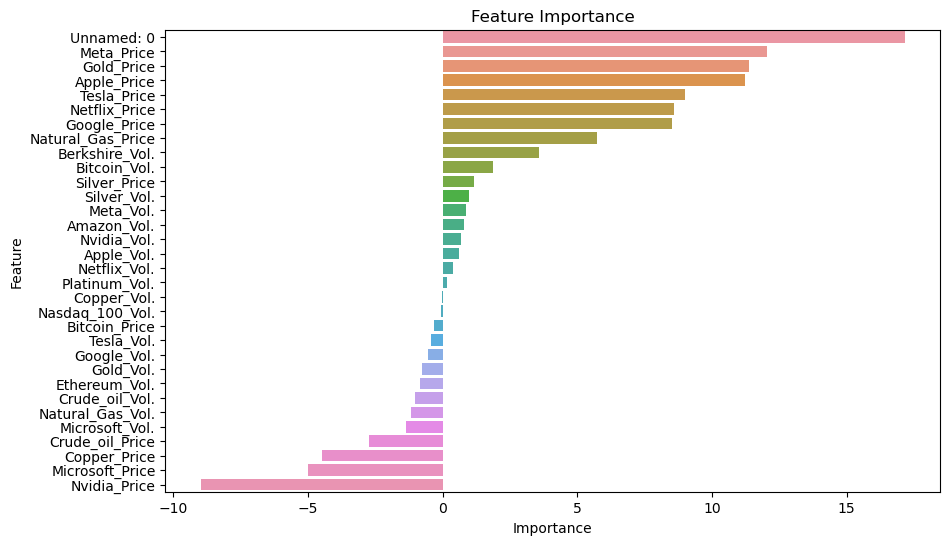

In [68]:
# Assuming model is a trained linear model and features is a list of feature names
# Get the coefficients of the model
feature_importance = model.coef_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()